In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
file = "data.csv"

In [27]:
df = pd.read_csv(file)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [28]:
df.isnull().sum().head()

Unnamed: 0    0
ID            0
Name          0
Age           0
Photo         0
dtype: int64

In [29]:
# DATA CLEANING

# Cleaning up numeric columns : wage, value, release clause 
df["Release Clause"]=df["Release Clause"].str.replace("M","000000")
df["Release Clause"]=df["Release Clause"].str.replace("K","000")
df["Release Clause"]=df["Release Clause"].str.replace("€","")
df["Release Clause"]=df["Release Clause"].str.replace(".","")
df["Release Clause"] = df["Release Clause"].astype(float)

In [30]:
df["Wage"]=df["Wage"].str.replace("M","000000")
df["Wage"]=df["Wage"].str.replace("K","000")
df["Wage"]=df["Wage"].str.replace("€","")
df["Wage"]=df["Wage"].str.replace(".","")
df["Wage"] = df["Wage"].astype(int)

In [31]:
df["Value"]=df["Value"].str.replace("M","000000")
df["Value"]=df["Value"].str.replace("K","000")
df["Value"]=df["Value"].str.replace("€","")
df["Value"]=df["Value"].str.replace(".","")
df["Value"] = df["Value"].astype(int)

In [32]:
# Combining the positions
def player_positions(x):
    a = ['GK']
    b = ['LWB','RWB','LB','LCB','CB','RCB','RB']
    c = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
    d = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
    if x in a:
        return 'Goalkeeper'
    elif x in b:
        return 'Defender'
    elif x in c:
        return 'Midfielder'
    elif x in d:
        return 'Attacker'
    else:
        return 'NaN'
df['Simplified Position'] = df['Position'].apply(player_positions)

In [33]:
df = df.rename(columns={"Release Clause": "Release Clause(€)",
                       "Wage": "Wage(€)",
                       "Value": "Value(€)"})
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value(€),Wage(€),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(€),Simplified Position
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,1105000000,565000,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09,Attacker
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,405000,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09,Attacker
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,1185000000,290000,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09,Attacker
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000,260000,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09,Goalkeeper
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000,355000,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09,Midfielder
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000,340000,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,1-Ju

In [34]:
# placing players in their respective leagues. Focusing on top four league (Premier League, La Liga, Seria A, Bundesliga, League 1)

def soccer_leagues(player):
    la_liga = ['Deportivo Alavés', 'FC Barcelona', 'Atlético Madrid', 'Real Madrid', 'Valencia CF', 'Getafe FC', 'Sevilla FC', 'RCD Espanyol', 'Athletic Club de Bilbao', 'Real Sociedad', 'Real Betis', 'SD Eibar', 'CD Leganés', 'Villarreal CF', 'Levante UD','Real Valladolid CF', 'RC Celta', 'Girona FC','SD Huesca', 'Rayo Vallecano']
    premier_league = ['Manchester City','Liverpool','Chelsea','Tottenham Hotspur','Arsenal','Manchester United','Wolverhampton Wanderers','Everton','Leicester City','West Ham United','Watford','Crystal Palace','Newcastle United','Bournemouth','Cardiff City','Fulham','Huddersfield Town']
    seria_a = ['Juventus', 'Napoli', 'Atalanta', 'Internacional', 'Milan', 'Roma', 'Torino', 'Lazio', 'Sampdoria', 'Bologna', 'Sassuolo','Udinese','SPAL','Parma','Cagliari','Fiorentina','Genoa','Empoli','Frosinone','Chievo Verona']
    bundes_liga = ['FC Bayern München', 'Borussia Dortmund', 'RB Leipzig', 'Bayer 04 Leverkusen', 'Borussia Mönchengladbach', 'VfL Wolfsburg', 'Eintracht Frankfurt', 'SV Werder Bremen', 'TSG 1899 Hoffenheim', 'Fortuna Düsseldorf', 'Hertha BSC', '1. FSV Mainz 05', 'SC Freiburg', 'FC Schalke 04', 'FC Augsburg', 'VfB Stuttgart', 'Hannover 96','1. FC Nürnberg']
    league_1 = ['Paris Saint-Germain', 'LOSC Lille', 'Olympique Lyonnais', 'AS Saint-Étienne', 'Marseille', 'Montpellier HSC', 'Stade de Reims', 'Stade de Reims', 'Nîmes Olympique', 'RC Strasbourg Alsace', 'RC Strasbourg Alsace','FC Nantes','Angers SCO','FC Girondins de Bordeaux','Amiens SC','Toulouse Football Club','AS Monaco','Dijon FCO','Stade Malherbe Caen','En Avant de Guingamp']
    if player in la_liga:
        return 'La Liga'
    elif player in premier_league:
        return 'Premier League'
    elif player in seria_a:
        return 'Seria A'
    elif player in bundes_liga:
        return 'Bundesliga'
    elif player in league_1:
        return 'League 1'
    else:
        return 'NaN'
df['League'] = df['Club'].apply(soccer_leagues)
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value(€),Wage(€),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(€),Simplified Position,League
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,1105000000,565000,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09,Attacker,La Liga
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,405000,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09,Attacker,Seria A
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,1185000000,290000,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09,Attacker,League 1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000,260000,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09,Goalkeeper,Premier League
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000,355000,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09,Midfielder,Premier League
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000,3400

In [54]:
#comparing positions and overall ratings in each league
player_position = df.groupby(['Simplified Position', 'League'])['Overall'].mean()
player_position = pd.DataFrame(player_position)

player_position.head()

Overall
Simplified Position League                   
Attacker            Bundesliga      72.260417
                    La Liga         73.627273
                    League 1        70.179775
                    NaN             65.302166
                    Premier League  73.090909

In [57]:
#reseting the DataFrame
player_position = player_position.reset_index()

player_position_pivot = player_position.pivot(index="League",columns="Simplified Position")["Overall"]
player_position_pivot = player_position_pivot.drop(columns=["NaN"])
player_position_pivot = player_position_pivot.drop(["NaN"])
player_position_pivot.style.format({"Attacker": "{:,.2f}",
                                    "Defender": "{:,.2f}",
                                    "Goalkeeper": "{:,.2f}",
                                    "Midfielder": "{:,.2f}",
                                    "NaN": "{:,.2f}"})

Simplified Position,Attacker,Defender,Goalkeeper,Midfielder
League,,,,
Bundesliga,72.26,72.53,70.46,72.74
La Liga,73.63,73.12,72.03,73.55
League 1,70.18,70.77,68.81,71.65
Premier League,73.09,72.80,72.67,73.02
Seria A,73.59,73.26,71.90,73.84


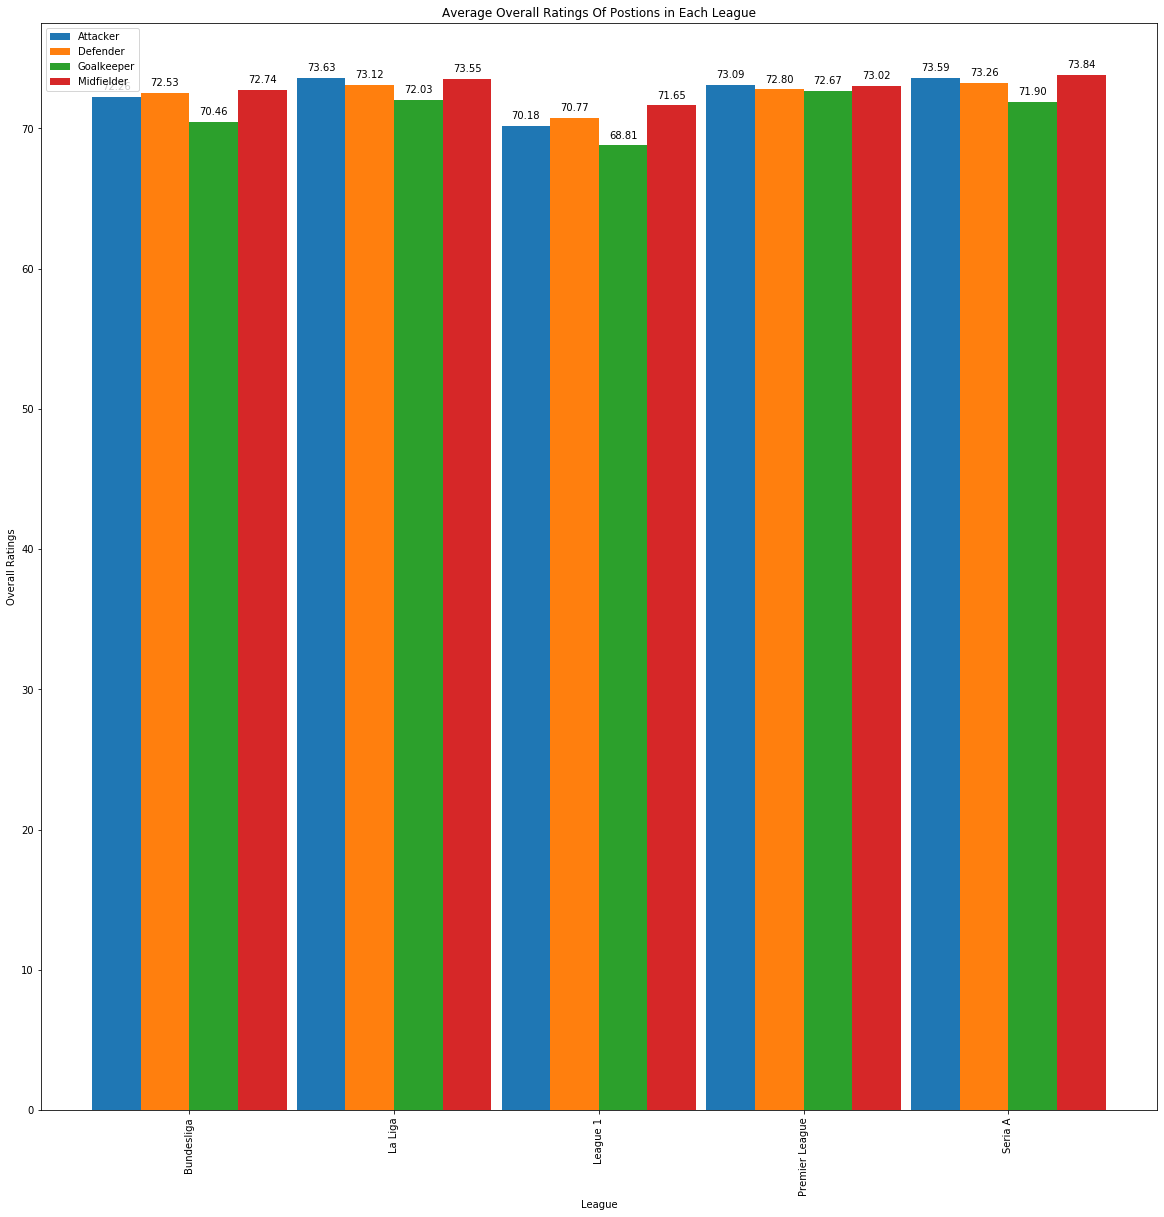

In [69]:
position_plot = player_position_pivot.plot(kind="bar", figsize=(20,20), width = 0.95)

for p in position_plot.patches:
    position_plot.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Average Overall Ratings Of Postions in Each League")
plt.ylabel("Overall Ratings")
plt.xlabel("League")
plt.legend()

plt.savefig("Avg position.png")


In [38]:
#comparing positions and Wages in each league
player_wage = df.groupby(['Simplified Position', 'League'])['Wage(€)'].mean()
player_wage = pd.DataFrame(player_wage)
player_wage.head()

Wage(€)
Simplified Position League                      
Attacker            Bundesliga      26020.833333
                    La Liga         52309.090909
                    League 1        23685.393258
                    NaN              6383.293228
                    Premier League  65656.565657

In [59]:
#reseting the DataFrame
player_wage = player_wage.reset_index()

player_wage_pivot = player_wage.pivot(index="League",columns="Simplified Position")["Wage(€)"]
player_wage_pivot = player_wage_pivot.drop(columns=["NaN"])

player_wage_pivot = player_wage_pivot.drop(["NaN"])

player_wage_pivot.style.format({"Attacker": "{:,.2f}",
                                    "Defender": "{:,.2f}",
                                    "Goalkeeper": "{:,.2f}",
                                    "Midfielder": "{:,.2f}",
                                    "NaN": "{:,.2f}"})

Simplified Position,Attacker,Defender,Goalkeeper,Midfielder
League,,,,
Bundesliga,"26,020.83","23,874.29","18,738.46","27,606.64"
La Liga,"52,309.09","31,573.68","26,787.88","31,716.22"
League 1,"23,685.39","19,220.13","13,631.58","21,592.18"
Premier League,"65,656.57","51,046.63","42,181.82","60,812.81"
Seria A,"40,208.70","30,564.71","21,118.64","32,619.29"


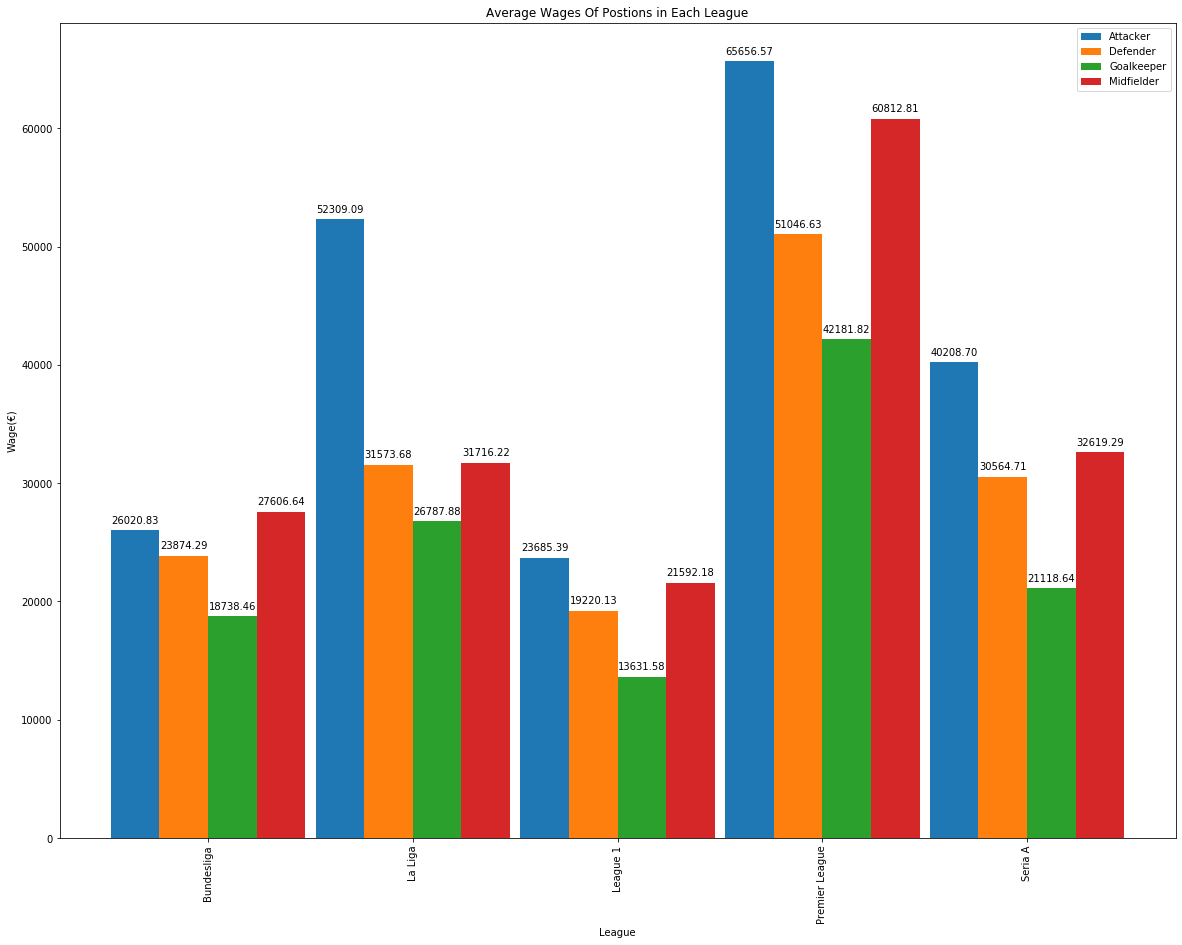

In [64]:
multi_plot = player_wage_pivot.plot(kind="bar", figsize=(20,15), width = .95)

for p in multi_plot.patches:
    multi_plot.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Average Wages Of Postions in Each League")
plt.ylabel("Wage(€)")
plt.xlabel("League")
plt.legend()

plt.savefig("Avg wages.png")
